In [1]:
import os 
os.chdir('../src/')
print(os.getcwd())
from traffic_analysis.d05_evaluation.chunk_evaluator import ChunkEvaluator
from traffic_analysis.d00_utils.load_confs import load_parameters
from traffic_viz.d06_visualisation.chunk_evaluation_plotting import (
    plot_video_stats_diff_distribution,
    plot_video_level_summary_stats,
    plot_mAP_over_time)

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
params = load_parameters()
pd.set_option('display.max_columns', 500)

%matplotlib inline

C:\Users\Caroline Wang\OneDrive\DSSG\air_pollution_estimation\src


Read in video level data

In [2]:
xml_paths = ["C:\\Users\\Caroline Wang\\OneDrive\\DSSG\\air_pollution_estimation\\annotations\\15_2019-06-29_13-01-03.094068_00001.01252.xml",
            "C:\\Users\\Caroline Wang\\OneDrive\\DSSG\\air_pollution_estimation\\annotations\\14_2019-06-29_13-01-19.744908_00001.05900.xml"]

video_level_dfs = pd.read_csv("../data/carolinetemp/video_level_df.csv",
                    dtype={"camera_id": str},
                    parse_dates=["video_upload_datetime"])
del video_level_dfs['Unnamed: 0']

video_level_df_list = []
video_level_groups = video_level_dfs.groupby(['camera_id', 'video_upload_datetime'])
for name, group in video_level_groups: 
    video_level_df_list.append(group)

Read in frame level data

In [3]:
frame_level_dfs = pd.read_csv("../data/carolinetemp/frame_level_df.csv",
                    dtype={"camera_id": str},
                    converters={"bboxes": lambda x: [float(coord) for coord in x.strip("[]").split(", ")]}, 
                    parse_dates=["video_upload_datetime"])
del frame_level_dfs['Unnamed: 0']

frame_level_df_list = []
frame_level_groups = frame_level_dfs.groupby(['camera_id', 'video_upload_datetime'])
for name, group in frame_level_groups: 
    frame_level_df_list.append(group)


Run evaluators

In [4]:
chunk_evaluator = ChunkEvaluator(annotation_xml_paths=xml_paths,
                                 params=params,
                                 video_level_dfs=video_level_df_list,
                                 frame_level_dfs = frame_level_df_list)
video_level_diff_df = chunk_evaluator.evaluate_video_level()
video_level_stats_df = chunk_evaluator.aggregate_video_stats_all_vehicle_types(video_level_diff_df)
frame_level_mAP_df = chunk_evaluator.evaluate_frame_level()

C:\Users\Caroline Wang\OneDrive\DSSG\air_pollution_estimation\src\traffic_analysis\d05_evaluation\video_level_evaluator.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.loc[len(df) + 1] = new_row_dict
C:\Users\Caroline Wang\OneDrive\DSSG\air_pollution_estimation\src\traffic_analysis\d05_evaluation\video_level_evaluator.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.loc[len(df) + 1] = new_row_dict


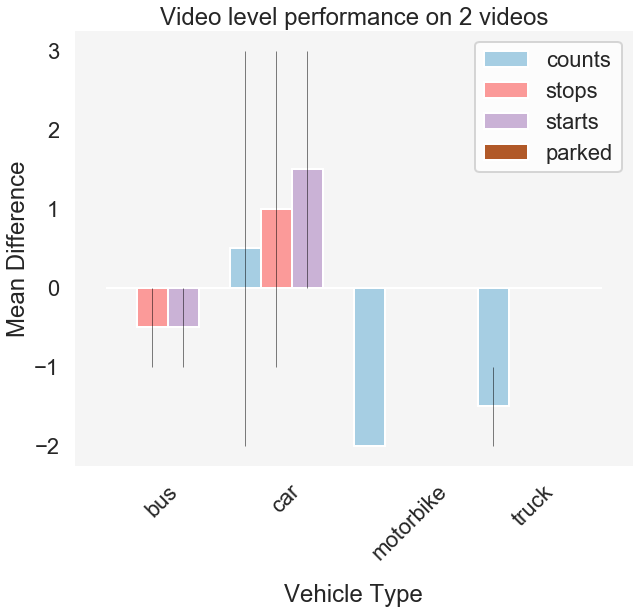

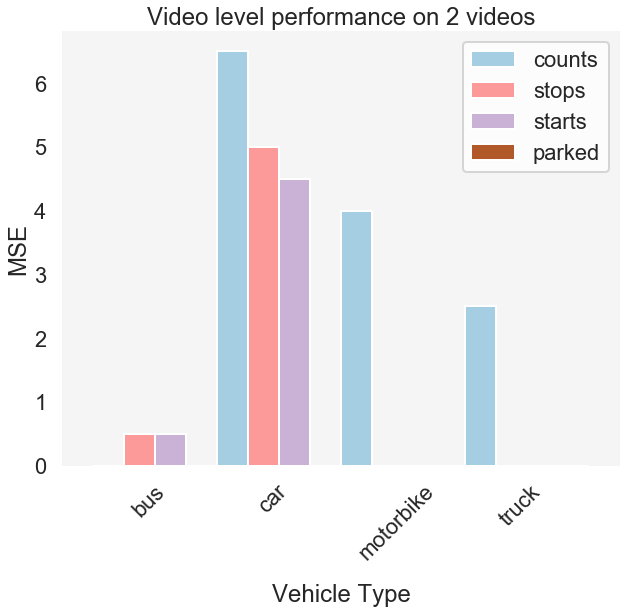

In [5]:
plot_video_level_summary_stats(video_level_stats_df, 
                       metrics = {'mean_diff':"../data/plots/video_mean.pdf",
                                  'mse':"../data/plots/video_mse.pdf"})

Plot video level diffs

In [6]:
video_level_diff_df

,camera_id,video_upload_datetime,vehicle_type,y_pred-y_counts,y_pred-y_starts,y_pred-y_stops,y_pred-y_parked
0,00001.01252,2019-06-29 13:01:03.094068,bus,0,0.0,0.0,0
1,00001.01252,2019-06-29 13:01:03.094068,car,3,0.0,3.0,0
2,00001.01252,2019-06-29 13:01:03.094068,motorbike,-2,0.0,0.0,0
3,00001.01252,2019-06-29 13:01:03.094068,truck,-1,0.0,0.0,0
0,00001.05900,2019-06-29 13:01:19.744908,bus,0,-1.0,-1.0,0
1,00001.05900,2019-06-29 13:01:19.744908,car,-2,3.0,-1.0,0
2,00001.05900,2019-06-29 13:01:19.744908,motorbike,-2,0.0,0.0,0
3,00001.05900,2019-06-29 13:01:19.744908,truck,-2,0.0,0.0,0


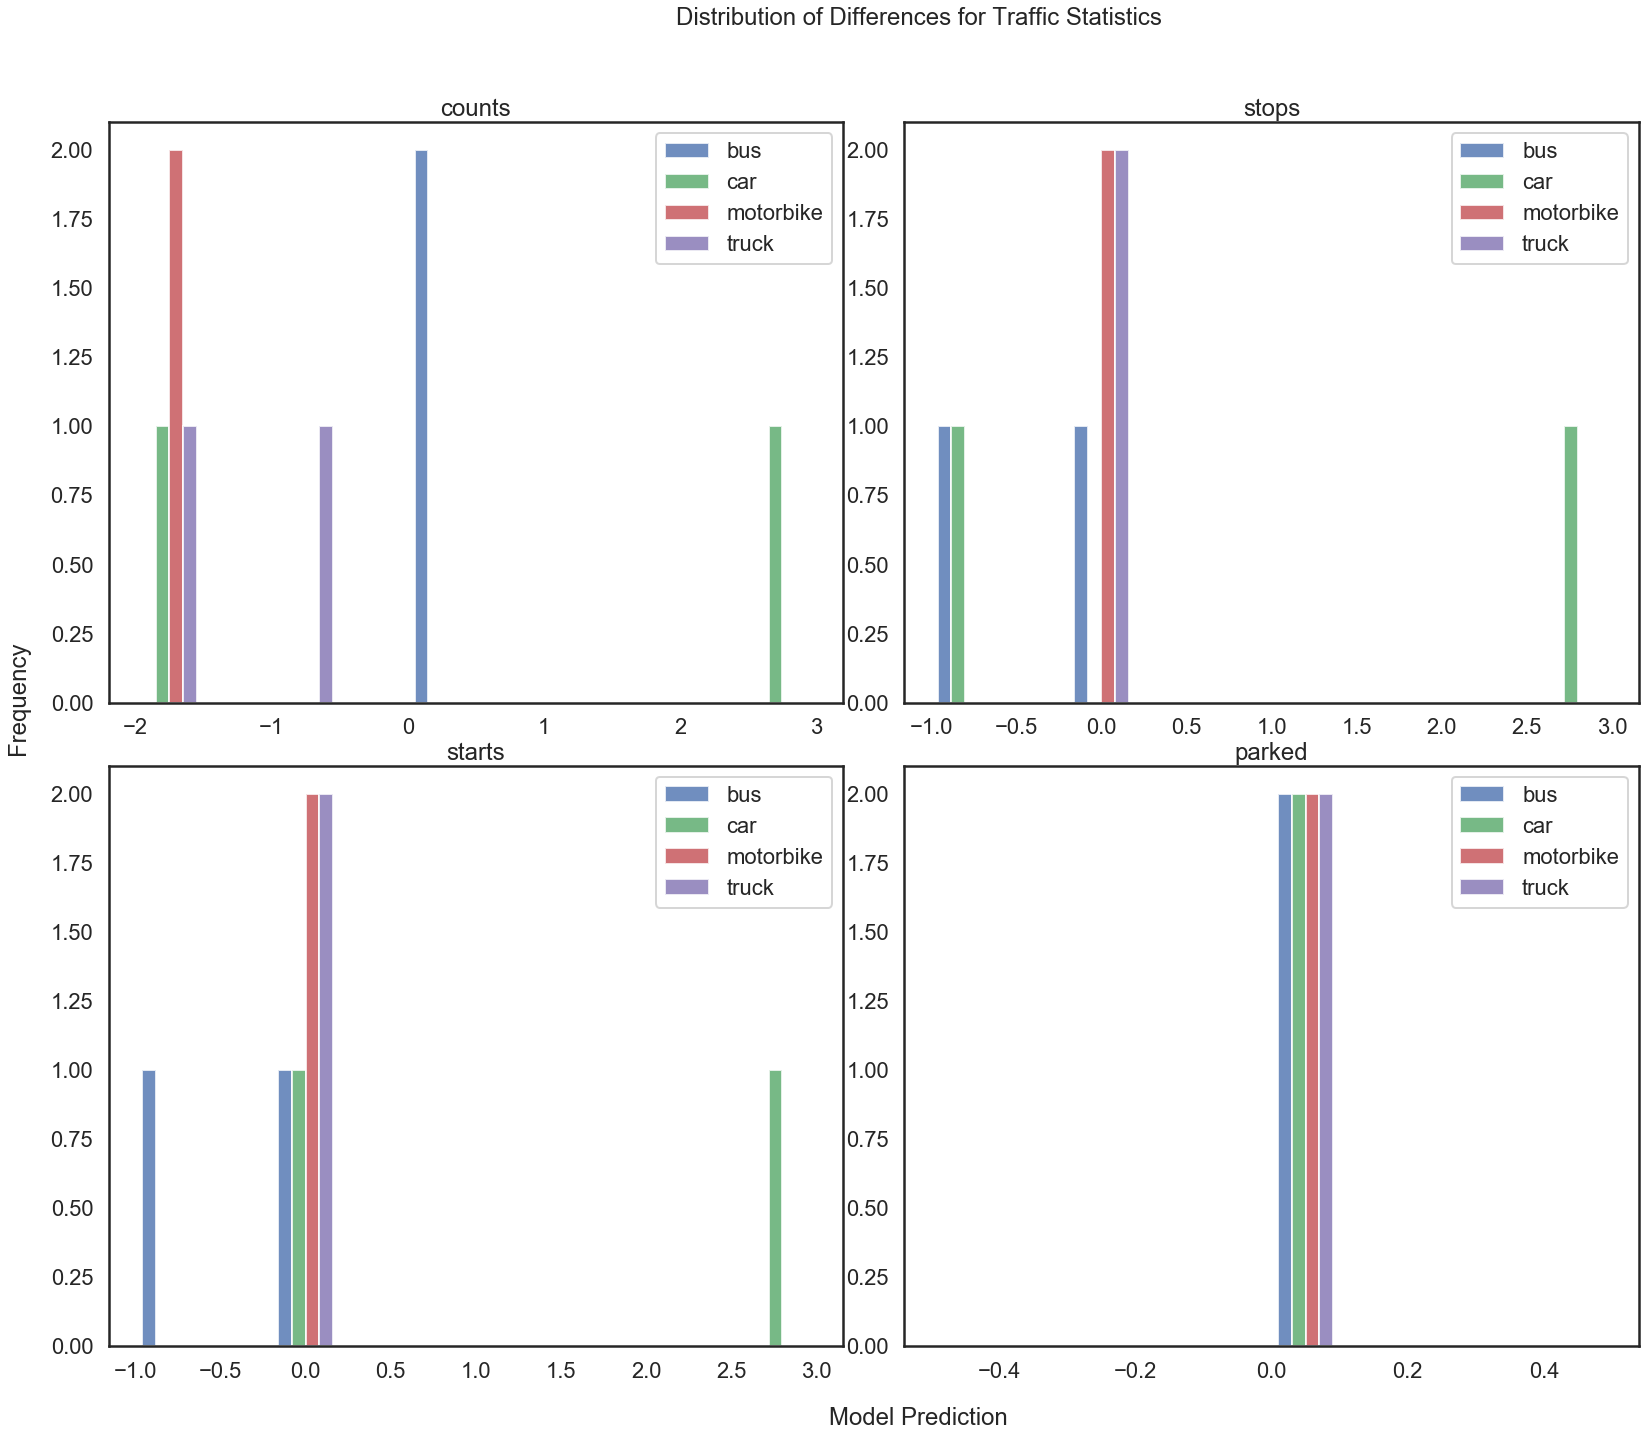

In [8]:
plot_video_stats_diff_distribution(video_level_diff_df,video_stat_types = params["video_level_stats"])

## Frame Level Plotting

In [9]:
frame_level_mAP_df

,vehicle_type,mean_avg_precision,camera_id,video_upload_datetime
0,car,0.541,00001.01252,2019-06-29 13:01:03.094068
1,truck,0.000,00001.01252,2019-06-29 13:01:03.094068
2,bus,0.000,00001.01252,2019-06-29 13:01:03.094068
3,motorbike,0.000,00001.01252,2019-06-29 13:01:03.094068
0,car,6.094,00001.05900,2019-06-29 13:01:19.744908
1,truck,0.000,00001.05900,2019-06-29 13:01:19.744908
2,bus,0.000,00001.05900,2019-06-29 13:01:19.744908
3,motorbike,0.000,00001.05900,2019-06-29 13:01:19.744908


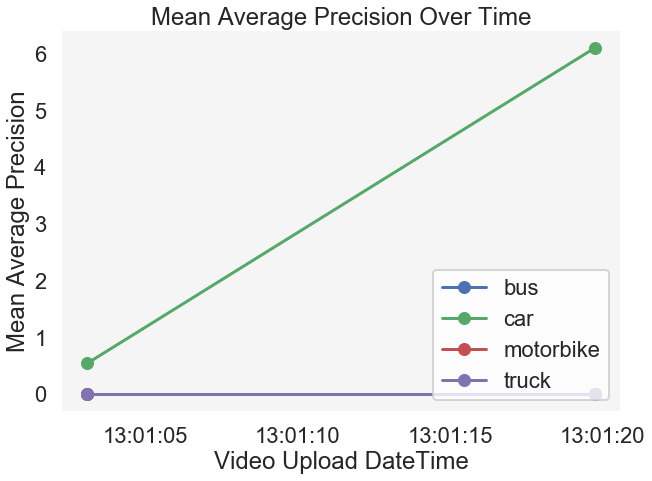

In [10]:
plot_mAP_over_time(frame_level_mAP_df)